In [1]:
#-*- coding: utf-8 -*

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Cust

In [2]:
data_cust = pd.read_csv("customers.csv", encoding='utf-8')

In [3]:
#Voyons d'abord s'il y a des valeurs manquantes pour les transactions : 

#On utilise .any().any() pour savoir si le Df possède une valeur manquante (n'importe laquelle)
#En utilisant un seul any() on a un résultat par colonne (donc plus précis)
#Comme ici on cherche juste à savoir si une valeur est manquante, pas besoin de précision
#Sauf si effectivement une valeur manque, dans ce cas lancer des tests plus approfondies pour trouver laquelle

if data_cust.isnull().any().any() == False : 
    print("Aucune valeur manquante")
else : 
    print("Des valeurs sont manquantes")

Aucune valeur manquante


## Valeur de la colonne 'sex'

In [4]:
#On crée une liste que l'on pourra modifier si une valeur est ajoutée pour la colonne "sex"
sex = ["m", "f"]

#On test ensuite si chaque valeur de la colonne est bien dans la liste, si oui alors 1, si non alors 0 : 
result = []

for ligne in data_cust["sex"].iteritems():
    if ligne[1] in sex :
        data = 0
    else : 
        data = 1
    result.append(data)
result = sum(result)

if result == 0 :
    print("Pas d'autres valeurs que celles de la liste")
else : 
    print("Il y a d'autres valeurs que celles de la liste, {} erreurs au total".format(result))
    
#Ca ne fonctionne pas...

Pas d'autres valeurs que celles de la liste


## Client_ID

In [5]:
#Vérifions qu'il n'y a pas de doublon pour Client_id : 
data_cust_id = data_cust['client_id']
X = 0
for ligne in data_cust_id.iteritems():
    X += 1
print('le nombre de lignes est de {}'.format(X))
    
data_cust_id.drop_duplicates()

Y = 0
for ligne in data_cust_id.iteritems():
    Y += 1
print('Sans doublons, le nombre de lignes est de {}'.format(Y))

if X == Y:
    print('Pas de doublon')
else:
    print('Des doublons sont présents')

le nombre de lignes est de 8623
Sans doublons, le nombre de lignes est de 8623
Pas de doublon


## Date de naissance

In [6]:
#Voyons tout d'abord si il n'y a pas de valeurs abérantes dans les dates de naissance : 

print('le client le plus jeune est né en : ', data_cust['birth'].max())
print('le client le plus vieux est né en : ',data_cust['birth'].min())

#On cherche ici à afficher un message d'erreur si les clients ont plus de 10 ans et moins de 95 ans. 
if data_cust['birth'].max() < 2005 and data_cust['birth'].min() > 1926 :
    print("Le minimum et le maximum des dates ne sont pas aberrant")
elif data_cust['birth'].max() > 2005 and data_cust['birth'].min() > 1926 : 
    print('Un ou plusieurs clients sont âgés de moins de 10 ans, vérifier la/les valeur(s) ! ')
elif data_cust['birth'].max() < 2005 and data_cust['birth'].min() < 1926 : 
    print('Un ou plusieurs clients sont âgés de plus de 95 ans, vérifier la/les valeur(s) ! ')
else : 
    print('Un ou plusieurs clients sont âgés de plus de 95 ans et de moins de 10 ans, vérifier les valeurs !')

le client le plus jeune est né en :  2004
le client le plus vieux est né en :  1929
Le minimum et le maximum des dates ne sont pas aberrant


In [7]:
#Voyons ensuite si il manque des dates : 
#Fait doublon avec le premier test, mais mieux vaut trop que pas assez

data_manquantes = data_cust[data_cust['birth'] == pd.NaT]
print(data_manquantes)
print("Le DataFrame étant vite, pas de valeur manquante")

#Aucune valeur manquante pour les dates

Empty DataFrame
Columns: [client_id, sex, birth]
Index: []
Le DataFrame étant vite, pas de valeur manquante


In [8]:
#Rajoutons ensuite une colonne "age", qui nous servira dans l'analyse : 
data_cust["age"] = 2022 - data_cust["birth"]

#Probleme si une personne née en mars alors 1 an de moins que le résultat de ce calcul

# Data Prod

In [9]:
data_prod = pd.read_csv("products.csv", encoding='utf-8')

In [10]:
#Voyons d'abord s'il y a des valeurs manquantes pour les produits : 

if data_prod.isnull().any().any() == False : 
    print("Aucune valeur manquante")
else : 
    print("Des valeurs sont manquantes")

Aucune valeur manquante


## Price

In [11]:
#Recherche de prix aberrants (= ou < à zéro):
if data_prod[data_prod.price <= 0].any().any() == False : 
    print("Aucune valeur abberante")
else : 
    print("Une ou plusieur valeur(s) aberrante(s)")
    

Une ou plusieur valeur(s) aberrante(s)


In [12]:
#Cherchons à savoir la valeur du prix = ou < à zéro

print(data_prod[data_prod.price <= 0])
print('Une valeur est donc aberrante, puisque inférieure ou égale à zéro')

    id_prod  price  categ
731     T_0   -1.0      0
Une valeur est donc aberrante, puisque inférieure ou égale à zéro


### Traitement de la valeur abberante

In [13]:
#On remarque que cette valeur est dans la catégorie 0, mais aussi qu'elle a comme id_prod T_0
#La particularité de T_0 est que c'est un ID de test, que l'on verra dans les parties suivantes.
#On peut donc supprimer tout simplement cette valeur, qui ne correspond pas à une vente mais à un test.

data_prod = data_prod[data_prod['price'] > 0]

## Catégories de produits

In [14]:
#Tout d'abord, on définit une liste de toutes les catégories possibles : 

categories = [0, 1, 2]

#On test ensuite si chacune des valeurs de la colonne categ est bien présente dans la liste : 

result = []

for categ in data_prod['categ'].iteritems():
    if categ[1] in categories:
        data = 0
    else:
        data = 1
    result.append(data)
result = sum(result)

if result == 0:
    print("Pas d'autres catégories que celles de la liste")
else :
    print("D'autres catégories que celles de la liste, {} erreurs".format(result))

Pas d'autres catégories que celles de la liste


# Data Transac

In [15]:
data_transac = pd.read_csv("transactions.csv", encoding='utf-8')

## Valeurs manquantes

In [16]:
#Voyons d'abord s'il y a des valeurs manquantes pour les transactions : 

if data_transac.isnull().any().any() == False : 
    print("Aucune valeur manquante")
else : 
    print("Des valeurs sont manquantes")

Aucune valeur manquante


## Valeurs en double

In [17]:
#D'abord, on vérifie s'il y a des doublons dans client_id : 
data_client_id = data_transac['client_id']
A = 0
for ligne in data_client_id.iteritems():
    A += 1
    
data_client_id.drop_duplicates

B = 0
for ligne in data_client_id.iteritems():
    B += 1
    
if A == B :
    print('Pas de doublon pour client_id')
else :
    print('Attention il y a des doublons pour client_id !')

print('\n')
#Puis dans session_id : 

data_session_id = data_transac['session_id']
C = 0
for ligne in data_session_id.iteritems():
    C += 1
    
data_session_id.drop_duplicates

D = 0
for ligne in data_session_id.iteritems():
    D += 1
    
if C == D :
    print('Pas de doublon pour session_id')
else :
    print('Attention il y a des doublons pour session_id !')

print('\n')
#Puis dans id_prod : 

data_prod_id = data_transac['id_prod']
E = 0
for ligne in data_prod_id.iteritems():
    E += 1
    
data_prod_id.drop_duplicates

F = 0
for ligne in data_prod_id.iteritems():
    F += 1
    
if E == F :
    print('Pas de doublon pour id_prod')
else :
    print('Attention il y a des doublons pour id_prod !')
    
#Revoir ce point : Faire sur le Df et non sur des colonnes.

Pas de doublon pour client_id


Pas de doublon pour session_id


Pas de doublon pour id_prod


## Dates

In [18]:
from datetime import datetime

In [19]:
#D'abord, on va diviser la colonne date en plusieurs colonnes : 

data_transac['date'], data_transac['time'] = data_transac['date'].str.split(pat=" ").str

data_transac['year'], data_transac['month'], data_transac['day'] = data_transac['date'].str.split(pat='-').str

data_transac['hour'], data_transac['minute'], data_transac['seconde'] = data_transac['time'].str.split(pat=':').str

In [20]:
#Vérifions si les heures/minutes/secondes sont toutes correctes

#Test if basique qui renvoie les valeurs si elles sont comprises entre 0 et 24(exclu, puisque à 23h59 on passe à 00h00)
#On est obligé d'ajouter int() car on utilise des <>
if int(data_transac['hour'].min()) >= 0 and int(data_transac['hour'].max())<24 :
    print("l'heure minimum pour l'achat est : ",data_transac['hour'].min())
    print("l'heure maximum pour l'achat est : ",data_transac['hour'].max())
else :
    print("Une (ou plusieurs) heure(s) n'est(ne sont) pas normale(s)")
    
print('\n')

#Même chose ici
if int(data_transac['minute'].min()) >= 0 and int(data_transac['minute'].max())<60 :
    print("la minute minimum pour l'achat est : ",data_transac['minute'].min())
    print("la minute maximum pour l'achat est : ",data_transac['minute'].max())
else :
    print("Une (ou plusieurs) minute(s) n'est(ne sont) pas normale(s)")
    
print('\n')

#Plus difficile pour les secondes puisque l'on a aussi les micro-secondes
#On se sert donc de int() comme avant, mais aussi de float() pour éviter le message d'erreur 
#invalid literal for int() with base 10: '00.000168'
if int(float(data_transac['seconde'].min())) >= 0 and int(float(data_transac['seconde'].max()))<60 :
    print("la seconde minimum pour l'achat est : ",data_transac['seconde'].min())
    print("la seconde maximum pour l'achat est : ",data_transac['seconde'].max())
else :
    print("Une (ou plusieurs) seconde(s) n'est(ne sont) pas normale(s)")

l'heure minimum pour l'achat est :  00
l'heure maximum pour l'achat est :  23


la minute minimum pour l'achat est :  00
la minute maximum pour l'achat est :  59


la seconde minimum pour l'achat est :  00.000168
la seconde maximum pour l'achat est :  59.999871


In [21]:
#Vérifions si les dates sont toutes bonnes 

#On commence par créer une liste pour les années : 

annees = ['2021', '2022']

result_annees = []

for ligne in data_transac["year"].iteritems():
    if ligne[1] in annees:
        data_annees = 0
    else : 
        data_annees = 1
    result_annees.append(data_annees)

result_annees = sum(result_annees)

if result_annees == 0:
    print("Pas d'erreur dans les années")
else : 
    print("D'autres valeurs que celles de la liste pour les années, {} erreurs".format(result_annees))
    


D'autres valeurs que celles de la liste pour les années, 200 erreurs


In [22]:
#Même chose pour les mois : 

mois = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"] #Pas possible d'utiliser range() ici ; Les valeurs sont 01 et pas 1 (et peut-être aussi le type de variable)

result_mois = []

for ligne in data_transac["month"].iteritems():
    if ligne[1] in mois:
        data_mois = 0
    else :
        data_mois = 1
    result_mois.append(data_mois)
result_mois = sum(result_mois)

if result_mois == 0:
    print("Pas d'erreur dans les mois")
else : 
    print("D'autres valeurs que celles de la liste pour les mois, {} erreurs".format(result_mois))


Pas d'erreur dans les mois


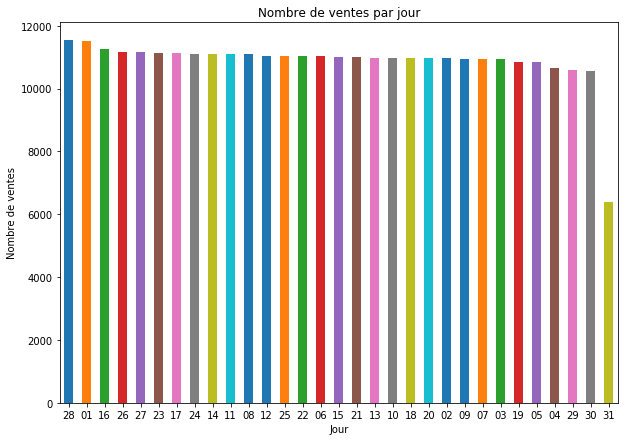

In [23]:
data_transac['day'].value_counts().plot(kind='bar', figsize=(10,7))
plt.title('Nombre de ventes par jour')
plt.xlabel('Jour')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.savefig('Graphiques/nombre_de_ventes_par_jour.png')
plt.show()

# Pour pousser l'analyse plus loin on pourrait regarder si les 29, 30, 31 correspondent bien aux bons mois (ex : Pas de 31 en février)

### Traitement de la valeur aberrante 

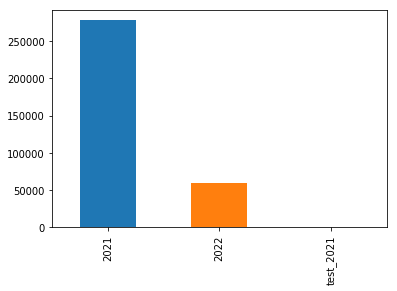

In [24]:
data_transac['year'].value_counts().plot(kind='bar')
plt.savefig('Graphiques/annee_valeur_aberrante.png')
plt.show()

In [25]:
test = data_transac[data_transac['year'] == "test_2021"]
test.head()

,id_prod,date,session_id,client_id,time,year,month,day,hour,minute,seconde
1431,T_0,test_2021-03-01,s_0,ct_1,02:30:02.237420,test_2021,03,01,02,30,02.237420
2365,T_0,test_2021-03-01,s_0,ct_1,02:30:02.237446,test_2021,03,01,02,30,02.237446
2895,T_0,test_2021-03-01,s_0,ct_1,02:30:02.237414,test_2021,03,01,02,30,02.237414
5955,T_0,test_2021-03-01,s_0,ct_0,02:30:02.237441,test_2021,03,01,02,30,02.237441
7283,T_0,test_2021-03-01,s_0,ct_1,02:30:02.237434,test_2021,03,01,02,30,02.237434


In [26]:
#Il s'agit ici d'un test effectué, voir si l'id client, session, et prod correspondent bien 
#Uniquement à un test ou bien sont affectés à un client réel

verif_idprod = data_transac[data_transac['id_prod'] == 'T_0']
verif_idprod = verif_idprod[verif_idprod['year'] != 'test_2021']
#DF vide
print("L'id de prod est bien uniquement un id de test")

print('\n')

verif_clientid = data_transac[data_transac['client_id'] == "ct_1"]
verif_clientid= verif_clientid[verif_clientid['year'] != 'test_2021']
#DF vide
print('Le client_id est donc bien uniquement un client_id de test')

print('\n')

verif_sessionid = data_transac[data_transac['session_id'] == "s_0"]
verif_sessionid= verif_sessionid[verif_sessionid['year'] != 'test_2021']
#DF vide
print('Le session_id est donc bien un session_id de test')

print('\n')

print('On peut donc enlever ces lignes du df, car elles ne sont pas représentatives.')

L'id de prod est bien uniquement un id de test


Le client_id est donc bien uniquement un client_id de test


Le session_id est donc bien un session_id de test


On peut donc enlever ces lignes du df, car elles ne sont pas représentatives.


In [27]:
data_transac = data_transac[data_transac['year'] != "test_2021"]

Produits sans fiche : 

In [28]:
#Regardons maintenant si des produits sont sans fiche : 
session_id = pd.merge(data_transac, data_prod, left_on="id_prod", right_on="id_prod", how='left')

session_id[pd.isna(session_id['price'])].head()

#Il faudra en tenir compte lors des corrélations.

,id_prod,date,session_id,client_id,time,year,month,day,hour,minute,seconde,price,categ
6231,0_2245,2021-06-17,s_49705,c_1533,03:03:12.668129,2021,06,17,03,03,12.668129,NaN,NaN
10797,0_2245,2021-06-16,s_49323,c_7954,05:53:01.627491,2021,06,16,05,53,01.627491,NaN,NaN
14045,0_2245,2021-11-24,s_124474,c_5120,17:35:59.911427,2021,11,24,17,35,59.911427,NaN,NaN
17480,0_2245,2022-02-28,s_172304,c_4964,18:08:49.875709,2022,02,28,18,08,49.875709,NaN,NaN
21071,0_2245,2021-03-01,s_3,c_580,00:09:29.301897,2021,03,01,00,09,29.301897,NaN,NaN


In [29]:
session_id['first_id_prod'], session_id['last_id_prod'] = session_id['id_prod'].str.split(pat="_").str

session_id = session_id[pd.isna(session_id['price'])]

print(all(session_id.first_id_prod == '0'))
print(all(session_id.id_prod == '0_2245'))

True
True


In [30]:
session_id["categ"] = "0"

data_prod_0 = data_prod[data_prod.categ == 0]

session_id["price"] = data_prod_0.mean()[1]

new_product = session_id[["id_prod", "price", "categ"]]

new_product = new_product[0:1]

In [31]:
data_prod = data_prod.append(new_product)

# Fichiers nettoyés

In [32]:
#Data_cust
data_cust.to_csv("customers_cleaned.csv", index = False)

In [33]:
#Data_prod
data_prod.to_csv("products_cleaned.csv", index = False)

In [34]:
#Data_transac
data_transac.to_csv("transactions_cleaned.csv", index = False)